In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as syp
import statistics
import glob
import csv
import scipy.stats as stats
from scipy.stats import linregress
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import norm

In [32]:
#Reading data from combined csv files
sentiment_csv = pd.read_csv("Files/Apple__sentiments_1xxx.csv")
price_csv = pd.read_csv("Files/Apple_1xxx.csv")

In [34]:
# Grouping table to find dates
grouped_by_date = sentiment_csv.groupby("Date")
date_keys = list(grouped_by_date.groups.keys())

date = [date_keys[x] for x in range(0,len(date_keys))]

index = [x for x in range(0,len(date_keys))]
name=[sentiment_csv["Company"][x] for x in range(len(date))]

#Price change
cod_price = list(price_csv["Percent Change"])

# # #Average SEntiment
avr_sentiment =list(grouped_by_date["Sentiment"].mean())
sum_sentiment =list(grouped_by_date["Sentiment"].sum())
master_df = pd.DataFrame({"Date":date, "Company":name, "COD_Price":cod_price,"Avr_sentiment":avr_sentiment,"Sum_sentiment": sum_sentiment})




In [22]:
(slope, intercept,rvalue,pvalue, stderr)=linregress(x,y)
reg_df= pd.DataFrame({"Slope": [slope], "Intercept": [intercept], "Rvalue": [rvalue], "Pvalue": [pvalue], "StdErr": [stderr]})


,Date,Company,COD_Price,Avr_sentiment,Sum_sentiment
0,2017-01-23,Apple,0.067,-2.882592,-28.825920
1,2017-01-24,Apple,-0.092,-3.987725,-39.877254
2,2017-01-25,Apple,1.592,-3.238096,-32.380961
3,2017-01-26,Apple,0.049,-10.242322,-102.423221
4,2017-01-27,Apple,0.008,1.701028,10.206169


<IPython.core.display.Javascript object>


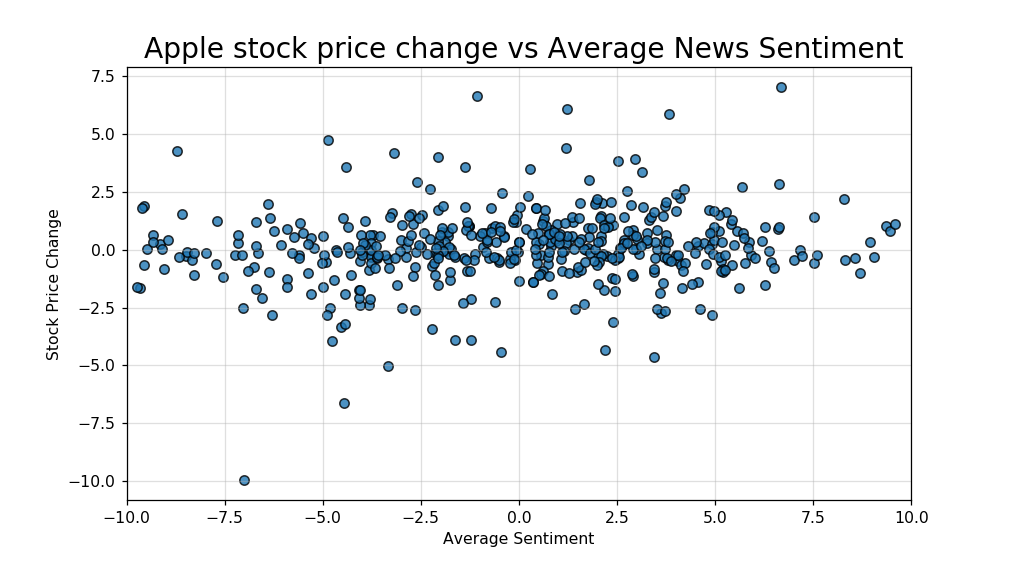

In [24]:
%matplotlib notebook
fig2 = plt.figure(figsize=(9, 5),dpi=90)
plt.scatter(master_df["Avr_sentiment"],master_df["COD_Price"], edgecolors="black", alpha =0.8, linewidths=1)
plt.xlim(-10,10)
plt.xlabel("Average Sentiment")
plt.ylabel("Stock Price Change")
plt.title(" Apple stock price change vs Average News Sentiment", fontsize=18)
plt.grid(alpha=0.4)
savefig('Files/AppleScatter.png')

In [16]:
# Describtive analysis is needed to check data accuracy and number of observations
master_df.describe()

,COD_Price,Avr_sentiment,Sum_sentiment
count,500.000000,500.000000,500.000000
mean,0.071998,-0.462782,-4.525478
std,1.602753,5.282286,47.018503
min,-9.961000,-41.068993,-234.025962
25%,-0.549750,-3.550524,-30.096516
50%,0.056000,0.212474,1.410996
75%,0.819250,2.910875,26.250399
max,7.042000,15.526150,133.692929
